Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).


Below, please fill in your name and collaborators, if any:

In [ ]:
NAME = "Andrea Minano"
COLLABORATORS = ""

# Assignment 4 - Classification

In this assignment, you will practice using the kNN (k-Nearest Neighbors) algorithm to solve a classification problem.
The kNN is a simple and robust classifier, which is used in different applications.

We will use the Iris dataset for this assignment.
The dataset was first introduced by statistician R. Fisher and consists of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width.

The goal is to train kNN algorithm to distinguish the species from one another.

1. The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

2. Download `iris.data` file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris. Alternatively, you can import the data using sklearn.datasets. You will need to dowload both the sepal/petal data and the target variable information, then merge the two datasets.

3. _(1 points)_ Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

4. _(2 points)_ **Data inspection.** 
    - Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data.
    - Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in different color (`seaborn.lmplot` is recommended for plotting). 

5. _(2 points)_ **Prepare the data for classification**. 
    - Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

6. _(1 point)_ **Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

7. _(2 points)_ **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`. 
    - First, instantiate the model,
    - Then, run the classifier on the training set.

8. _(3 points)_ Use learning model to **predict the class from features**, run prediction on `X` from test part. 
    - Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test.
    - Comparing these two arrays (predicted classes and test `Y`), count the numbers of correct predictions and predictions that were wrong. (**HINTS:** `NumPy` arrays can be compared using `==` operator. You can also use `NumPy`'s operator `count_nonzero` to count number of non-False values).

9. _(4 points)_ In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors `k`. We will use the following **number of neighbors `k`: 1, 3, 5, 7, 10, 20, 30, 40, and 50**:
    - Generate 10 random train/test splits for each value of `k`
    - Fit the model for each split and generate predictions
    - Average the accuracy score for each `k`
    - Calculate the average number of correct predictions for each `k` as well
    - Plot the accuracy score for different values of `k`. What conclusion can you make based on the graph?


In [1]:
# Here are all imports that you will need

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Data download from sklearn

from sklearn.datasets import load_iris
data=load_iris().data
target=load_iris().target
df_data=pd.DataFrame(data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_target=pd.DataFrame(target,columns=['target'])

# Remember to merge the DataFrames into one after they are created.

In [3]:
## ********* ASSIGNMENT CODE BELOW ************
## Code adapted from tutorial: https://colab.research.google.com/drive/1CmSvO0zCjObYSNCnXPY2QAoD_IoK6P-3?usp=drive_link#scrollTo=K25whqUfAHtT

## Question 1-3

# The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.
# Download iris.data file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris. Alternatively, you can import the data using sklearn.datasets. You will need to dowload both the sepal/petal data and the target variable information, then merge the two datasets.
# (1 points) Load the data from the file (iris.data) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

df_data_copy = df_data.copy()
df_target_copy = df_target.copy() # 0 = Iris Setosa ; 1 = Iris Versicolour ; 2 = Iris Virginica

df_data_merge = df_data_copy.join(df_target_copy) # Merge both datasets
df_data_merge

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
# Question 4

# (2 points) Data inspection.
# Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data.
# Prepare 2 scatter plots - sepal_width vs sepal_length and petal_width vs petal_length. Scatter plots should show each class in different color (seaborn.lmplot is recommended for plotting).

df_data_merge.head()

# Additional functions to help me understand the data

#df_data_merge.describe()

#df_data_merge.dtypes

#df_data_merge.isna().sum()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

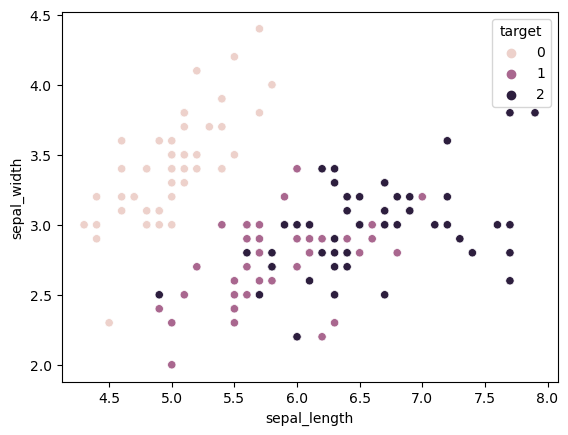

In [5]:
sns.scatterplot(data=df_data_merge, x="sepal_length", y="sepal_width", hue="target") 

# Target: 0 = Iris Setosa ; 1 = Iris Versicolour ; 2 = Iris Virginica

<Axes: xlabel='petal_length', ylabel='petal_width'>

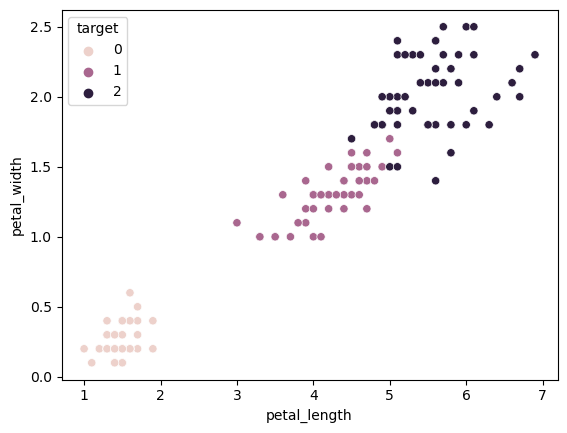

In [6]:
sns.scatterplot(data=df_data_merge, x="petal_length", y="petal_width", hue="target")

# Target: 0 = Iris Setosa ; 1 = Iris Versicolour ; 2 = Iris Virginica

In [7]:
# Question 5

# (2 points) Prepare the data for classification.
# Using the pandas operators prepare the feature variables X and the response Y for the fit. 
# Note that sklean expects data as arrays, so convert extracted columns into arrays.

X = df_data_merge[['sepal_length','sepal_width','petal_length','petal_width']]
y = df_data_merge["target"]

# Convert DF to arrays

X = X.values
y = y.values

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [8]:
# Question 6

# (1 point) Split the data into train and test using sklearn train_test_split function.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [9]:
X_train, X_test

(array([[4.8, 3. , 1.4, 0.1],
        [5.5, 3.5, 1.3, 0.2],
        [6.9, 3.1, 5.4, 2.1],
        [6.4, 3.1, 5.5, 1.8],
        [6. , 3. , 4.8, 1.8],
        [5. , 3.2, 1.2, 0.2],
        [5.9, 3. , 4.2, 1.5],
        [6.3, 2.9, 5.6, 1.8],
        [5.5, 2.4, 3.8, 1.1],
        [4.3, 3. , 1.1, 0.1],
        [6.4, 3.2, 5.3, 2.3],
        [5.5, 4.2, 1.4, 0.2],
        [5.6, 2.5, 3.9, 1.1],
        [6.1, 3. , 4.9, 1.8],
        [6.7, 3.1, 5.6, 2.4],
        [5.4, 3.4, 1.7, 0.2],
        [5.4, 3. , 4.5, 1.5],
        [5.7, 2.6, 3.5, 1. ],
        [5. , 2. , 3.5, 1. ],
        [4.9, 2.5, 4.5, 1.7],
        [6.7, 3. , 5. , 1.7],
        [6.2, 2.2, 4.5, 1.5],
        [6.9, 3.2, 5.7, 2.3],
        [6.8, 3. , 5.5, 2.1],
        [4.6, 3.4, 1.4, 0.3],
        [7.9, 3.8, 6.4, 2. ],
        [6.3, 2.8, 5.1, 1.5],
        [7.4, 2.8, 6.1, 1.9],
        [5. , 2.3, 3.3, 1. ],
        [6.7, 2.5, 5.8, 1.8],
        [6.4, 2.8, 5.6, 2.1],
        [5.4, 3.4, 1.5, 0.4],
        [6.8, 3.2, 5.9, 2.3],
        [6

In [10]:
# Question 7

# (2 points) Run the fit using KNeighborsClassifier from sklearn.neighbors.
# First, instantiate the model,
# Then, run the classifier on the training set.

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler() #by default, this will scale each column to between 0 and 1
# scaler = StandardScaler() #by default, this will scale each column to a z-score (how many standard deviations from the mean)
scaler.fit(X_train) #fit the scaler based on the scale of X_train, and then use the fitted scaler to transform both X_train and X_test (this is the correct way to use the scaler)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.min(), X_train_scaled.max())
print(X_test_scaled.min(), X_test_scaled.max()) # I'm assuming that the test dataset had values above or below the train dataset


0.0 1.0
0.0277777777777779 1.0909090909090908


In [11]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_scaled, y_train) #train the model on the scaled training set

CPU times: total: 0 ns
Wall time: 2.48 ms


KNeighborsClassifier(n_neighbors=3)

In [12]:
# Question 8
# (3 points) Use learning model to predict the class from features, run prediction on X from test part.
# Show the accuracy score of the prediction by comparing predicted iris classes and the Y values from the test.
# Comparing these two arrays (predicted classes and test Y), count the numbers of correct predictions and predictions that were wrong. (HINTS: NumPy arrays can be compared using == operator. You can also use NumPy's operator count_nonzero to count number of non-False values).

y_pred = knn_clf.predict(X_test_scaled) #make predictions for the scaled test set
print(y_pred.shape)
y_pred #these are the predictions made by the model

(30,)


array([0, 2, 0, 2, 1, 0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 1, 1, 2, 0, 0,
       2, 0, 0, 2, 1, 2, 1, 2])

In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9666666666666667


In [14]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [15]:
## Question 9

# In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors k. We will use the following number of neighbors k: 1, 3, 5, 7, 10, 20, 30, 40, and 50:

# Generate 10 random train/test splits for each value of k
# Fit the model for each split and generate predictions
# Average the accuracy score for each k
# Calculate the average number of correct predictions for each k as well
# Plot the accuracy score for different values of k. What conclusion can you make based on the graph?

def generate_10_random_tests(k):
    i = 0
    pred_scores = []
    while i < 10:
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        scaler = MinMaxScaler() #by default, this will scale each column to between 0 and 1
        # scaler = StandardScaler() #by default, this will scale each column to a z-score (how many standard deviations from the mean)
        scaler.fit(X_train) #fit the scaler based on the scale of X_train, and then use the fitted scaler to transform both X_train and X_test (this is the correct way to use the scaler)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        knn_clf = KNeighborsClassifier(n_neighbors=k)
        knn_clf.fit(X_train_scaled, y_train) #train the model on the scaled training set

        y_pred = knn_clf.predict(X_test_scaled) #make predictions for the scaled test set

        pred_scores.append((accuracy_score(y_test, y_pred)))
        
        i += 1
        
    return sum(pred_scores) / len(pred_scores) # return average in list


In [16]:
# k = 1
k_1 = generate_10_random_tests(1)
k_1

0.96

In [17]:
# k = 3
k_3 = generate_10_random_tests(3)
k_3

0.9666666666666666

In [18]:
# k = 5
k_5 = generate_10_random_tests(5)
k_5

0.9533333333333334

In [19]:
# k = 7
k_7 = generate_10_random_tests(7)
k_7

0.95

In [20]:
# k = 10
k_10 = generate_10_random_tests(10)
k_10

0.9566666666666667

In [21]:
# k = 20
k_20 = generate_10_random_tests(20)
k_20

0.9533333333333334

In [22]:
# k = 30
k_30 = generate_10_random_tests(30)
k_30

0.96

In [23]:
# k = 40
k_40 = generate_10_random_tests(40)
k_40

0.9266666666666667

In [24]:
# k = 50
k_50 = generate_10_random_tests(50)
k_50

0.89

<Axes: xlabel='k_value', ylabel='avg_pred_accuracy'>

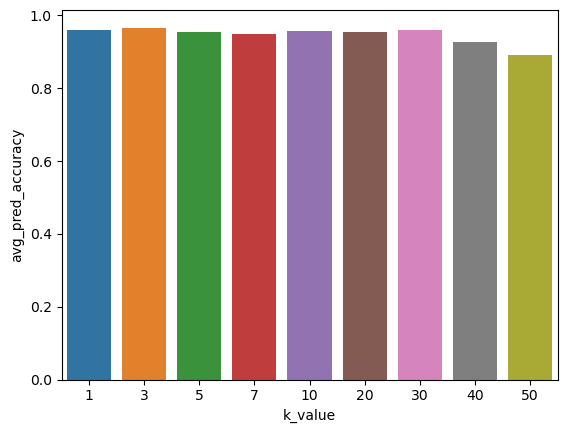

In [25]:
# Plot results
# 1, 3, 5, 7, 10, 20, 30, 40, and 50

pred_results_df = pd.DataFrame([[1,k_1],[3,k_3],[5,k_5],[7,k_7],[10,k_10],[20,k_20],[30,k_30],[40,k_40],[50,k_50]], columns=['k_value', 'avg_pred_accuracy'])

sns.barplot(pred_results_df, x='k_value', y='avg_pred_accuracy')
                                 

The accuracy score for k values is consistently high for k values < 40. It appears that once the k values exceed 40, the model starts to perform increasingly poor. The results for k = 50 are the worst out of all the k values tested. The reason might be that when k = 50, the model has to check each data point (i.e., each record of an iris flower) against 1/3rd of the total dataset of n=150. It could become increasingly difficult for the model to correctly derive patterns when comparing each data point against 50 other records.